In [2]:
# !pip install xgboost

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


In [4]:
df = pd.read_csv("Restaurant_revenue_new.csv")

In [5]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum().sort_values()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(1000, 8)

Text(0, 0.5, 'Monthly_Revenue')

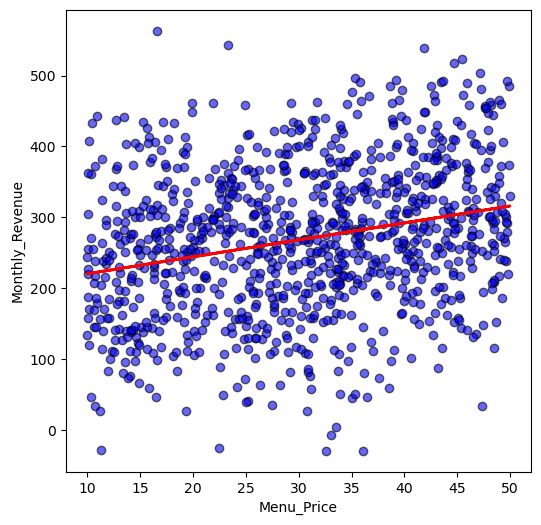

In [10]:
x=df["Menu_Price"]
y=df["Monthly_Revenue"]

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='black')

slope, intercept = np.polyfit(x, y, 1) 
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='red', linewidth=2, label="Fitted Line")



plt.xlabel("Menu_Price")
plt.ylabel("Monthly_Revenue")

Text(0, 0.5, 'Monthly_Revenue')

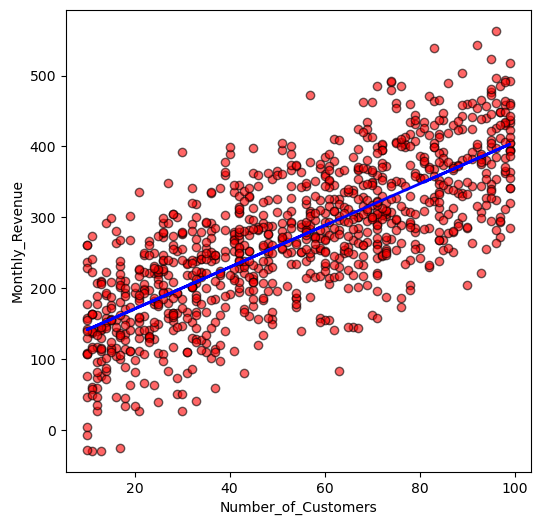

In [11]:
x=df["Number_of_Customers"]
y=df["Monthly_Revenue"]

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='red', alpha=0.6, edgecolors='black')

slope, intercept = np.polyfit(x, y, 1) 
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='blue', linewidth=2, label="Fitted Line")



plt.xlabel("Number_of_Customers")
plt.ylabel("Monthly_Revenue")

Text(0, 0.5, 'Monthly_Revenue')

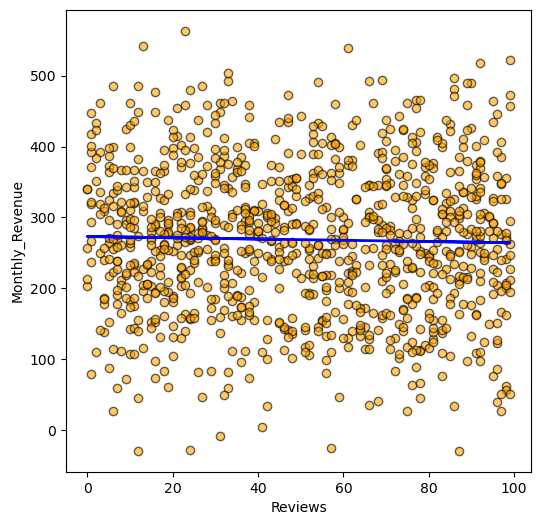

In [12]:
x=df["Reviews"]
y=df["Monthly_Revenue"]

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='orange', alpha=0.6, edgecolors='black')


slope, intercept = np.polyfit(x, y, 1)  
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='blue', linewidth=2, label="Fitted Line")


plt.xlabel("Reviews")
plt.ylabel("Monthly_Revenue")

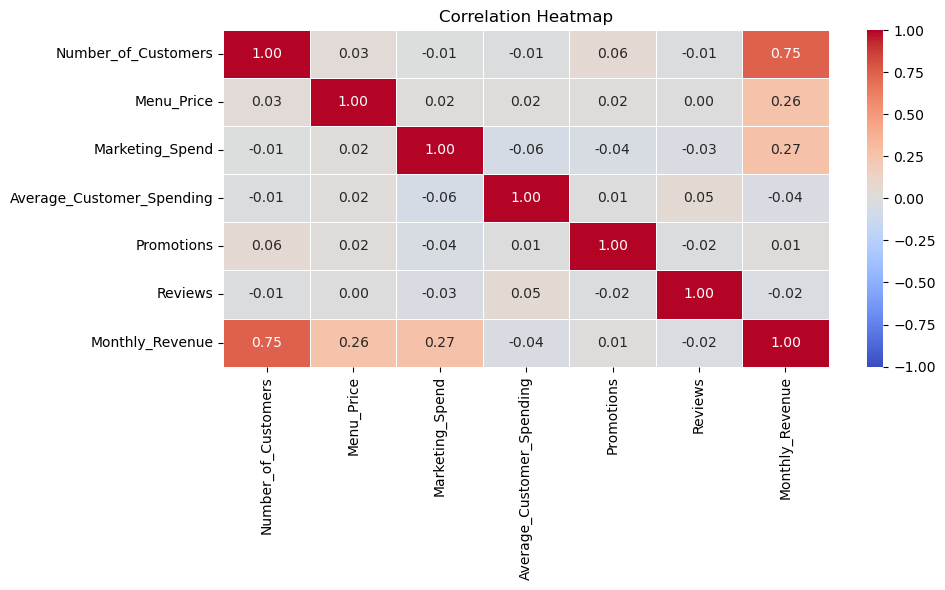

In [13]:
numeric_data = df.drop(columns=['Cuisine_Type'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

The feature like Number of customers, Menu price, Marketing_spend has more correlation with revenue than other features. The feature 'Number of customers' has more positive correlation. I have used scatter plot and as well as heatmap to find the best features. Meanwhile the features like Average_Customer_Spending and Reviews has negative correlation. It doesn't affect the monthly rev                        

In [14]:
correlation_matrix = numeric_data.corr()

print(correlation_matrix)

                           Number_of_Customers  Menu_Price  Marketing_Spend  \
Number_of_Customers                   1.000000    0.033470        -0.007024   
Menu_Price                            0.033470    1.000000         0.016319   
Marketing_Spend                      -0.007024    0.016319         1.000000   
Average_Customer_Spending            -0.013898    0.020808        -0.058586   
Promotions                            0.058693    0.022068        -0.041838   
Reviews                              -0.010140    0.003792        -0.031470   
Monthly_Revenue                       0.745239    0.259579         0.269929   

                           Average_Customer_Spending  Promotions   Reviews  \
Number_of_Customers                        -0.013898    0.058693 -0.010140   
Menu_Price                                  0.020808    0.022068  0.003792   
Marketing_Spend                            -0.058586   -0.041838 -0.031470   
Average_Customer_Spending                   1.000000   

In [15]:
unique_names = df['Cuisine_Type'].unique()

In [16]:
unique_names

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [18]:
dummies = pd.get_dummies(df['Cuisine_Type'] , drop_first=True)
dummies = dummies.astype(int)
dummies.head()

,Italian,Japanese,Mexican
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [19]:
df_new = pd.concat([df , dummies], axis = 1)

In [20]:
df_new = df_new.drop("Cuisine_Type", axis=1)


In [21]:
df_new

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Italian,Japanese,Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,0,1,0
1,24,40.020077,4.577892,17.952562,0,36,221.319091,1,0,0
2,81,41.981485,4.652911,22.600420,1,91,326.529763,0,1,0
3,70,43.005307,4.416053,18.984098,1,59,348.190573,1,0,0
4,30,17.456199,3.475052,12.766143,1,30,185.009121,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,249.312034,0,1,0
996,31,20.615496,5.822885,17.040990,0,57,110.228767,0,0,1
997,69,17.110656,4.141898,44.649315,0,55,312.212552,0,1,0
998,73,37.664722,3.046556,27.767358,0,23,272.482204,0,1,0


In [22]:
print(df_new.columns)

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
       'Average_Customer_Spending', 'Promotions', 'Reviews', 'Monthly_Revenue',
       'Italian', 'Japanese', 'Mexican'],
      dtype='object')


## Data Splitting

In [23]:
X = df_new.drop(columns=['Monthly_Revenue'])
y = df_new['Monthly_Revenue']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

### Linear Regression

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)


### Testing for overfitting

In [81]:
y_pred_lin = lin_reg.predict(X_test_scaled) #y_test
y_train_pred = lin_reg.predict(X_train_scaled) #y_train

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred_lin)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred_lin)

# Print the results
print(f"Training R²: {train_r2:.3f}")
print(f"Testing R²: {test_r2:.3f}")
print(f"Training MSE: {train_mse:.3f}")
print(f"Testing MSE: {test_mse:.3f}")



Training R²: 0.687
Testing R²: 0.674
Training MSE: 3363.613
Testing MSE: 3560.439


### Random Forest

In [27]:
ran_forest = RandomForestRegressor(n_estimators=100, random_state=42)
ran_forest.fit(X_train, y_train)

y_pred_rf = ran_forest.predict(X_test)

In [28]:
# print(y_pred_rf)

### XGBoost

In [29]:
xgboost = XGBRegressor(n_estimators=100, random_state=42)
xgboost.fit(X_train, y_train)

y_pred_xgb = xgboost.predict(X_test)

In [30]:
# print(y_pred_xgb)

## Model evaluation

In [31]:
def evaluation_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

In [32]:
# evaluation_metrics(y_test, y_pred_lin, "Linear Regression")

In [33]:
results = []


results.append(evaluation_metrics(y_test, y_pred_lin, "Linear Regression"))
results.append(evaluation_metrics(y_test, y_pred_rf, "Random Forest"))
results.append(evaluation_metrics(y_test, y_pred_xgb, "XGBoost"))

eval_df = pd.DataFrame(results)

eval_df = eval_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

print(eval_df)

               Model  R2 Score        MAE          MSE       RMSE
0  Linear Regression  0.674063  47.191936  3560.438835  59.669413
1      Random Forest  0.624958  51.583112  4096.839141  64.006555
2            XGBoost  0.542783  58.069601  4994.500883  70.671783


## Hyperparameter Tuning

### 1. Random Forest

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 14],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(
    estimator=ran_forest,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 14],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error', verbose=2)

In [35]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Cross-validation Score (negative MSE):", best_score)


y_pred_best_rf = best_rf_model.predict(X_test)
evaluation_metrics(y_test, y_pred_best_rf, "Tuned Random Forest")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 200}
Best Cross-validation Score (negative MSE): -3709.9079981609793


{'Model': 'Tuned Random Forest',
 'R2 Score': 0.6279837467697988,
 'MAE': 51.3347454333104,
 'MSE': 4063.790411166629,
 'RMSE': 63.74786593421484}

In [36]:
results.append(evaluation_metrics(y_test, y_pred_best_rf, "Tuned Random Forest"))

eval_df = pd.DataFrame(results)
eval_df = eval_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

print(eval_df)

                 Model  R2 Score        MAE          MSE       RMSE
0    Linear Regression  0.674063  47.191936  3560.438835  59.669413
1  Tuned Random Forest  0.627984  51.334745  4063.790411  63.747866
2        Random Forest  0.624958  51.583112  4096.839141  64.006555
3              XGBoost  0.542783  58.069601  4994.500883  70.671783


In [37]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300, 400],
}

grid_search_xgb = GridSearchCV(
    estimator=xgboost,
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',  
    cv=5,                               
    verbose=1,
    n_jobs=-1                           
)

grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error', verbose=1)

In [38]:
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score (Negative MSE) for XGBoost:", grid_search_xgb.best_score_)


best_xgb_model = grid_search_xgb.best_estimator_

y_pred_xgb = best_xgb_model.predict(X_test)

Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Score (Negative MSE) for XGBoost: -3669.460479135145


In [39]:
# evaluate_model(y_test, y_pred_xgb, "Tuned XGBoost")

In [40]:
results.append(evaluation_metrics(y_test, y_pred_xgb, "Tuned XGBoost"))

eval_df = pd.DataFrame(results)
eval_df = eval_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

print(eval_df)

                 Model  R2 Score        MAE          MSE       RMSE
0    Linear Regression  0.674063  47.191936  3560.438835  59.669413
1        Tuned XGBoost  0.653380  49.781844  3786.368405  61.533474
2  Tuned Random Forest  0.627984  51.334745  4063.790411  63.747866
3        Random Forest  0.624958  51.583112  4096.839141  64.006555
4              XGBoost  0.542783  58.069601  4994.500883  70.671783


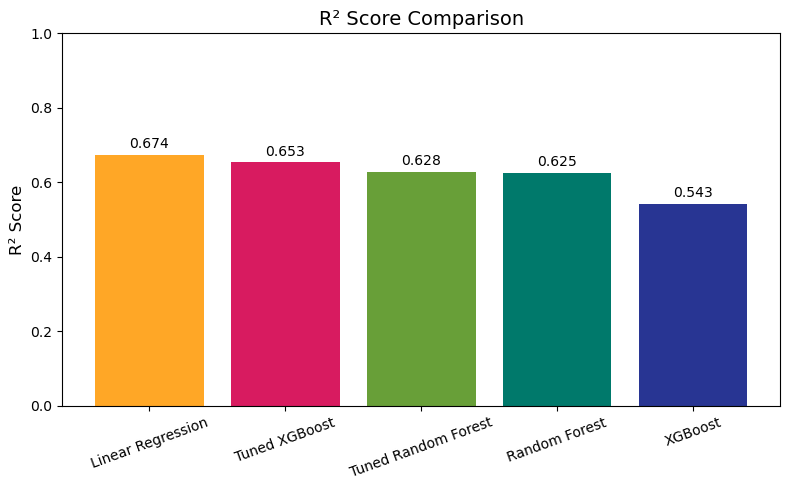

In [61]:
plt.figure(figsize=(8, 5))

colors = ['#FFA726', '#D81B60', '#689F38', '#00796B', '#283593']
bars = plt.bar(eval_df['Model'], eval_df['R2 Score'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('R² Score Comparison', fontsize=14)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=20)
plt.ylim(0, 1) 

plt.tight_layout()
plt.show()

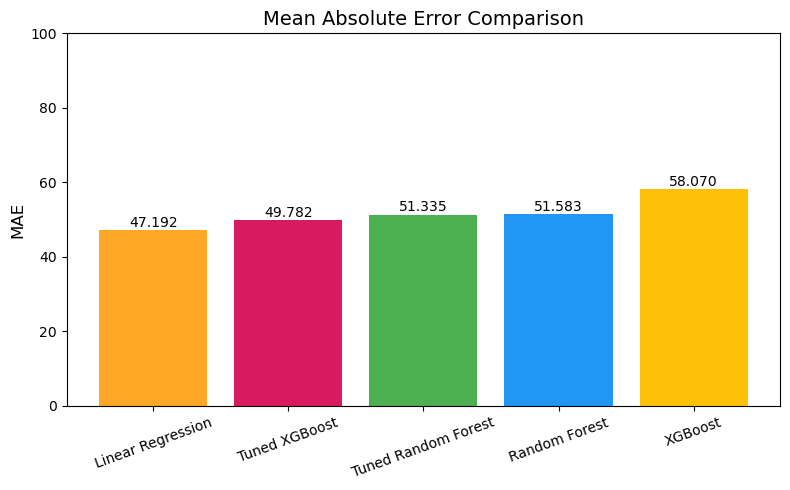

In [69]:
plt.figure(figsize=(8, 5))

colors = ['#FFA726', '#D81B60', '#4CAF50', '#2196F3', '#FFC107']
bars = plt.bar(eval_df['Model'], eval_df['MAE'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Mean Absolute Error Comparison', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.xticks(rotation=20)
plt.ylim(0, 100) 

plt.tight_layout()
plt.show()

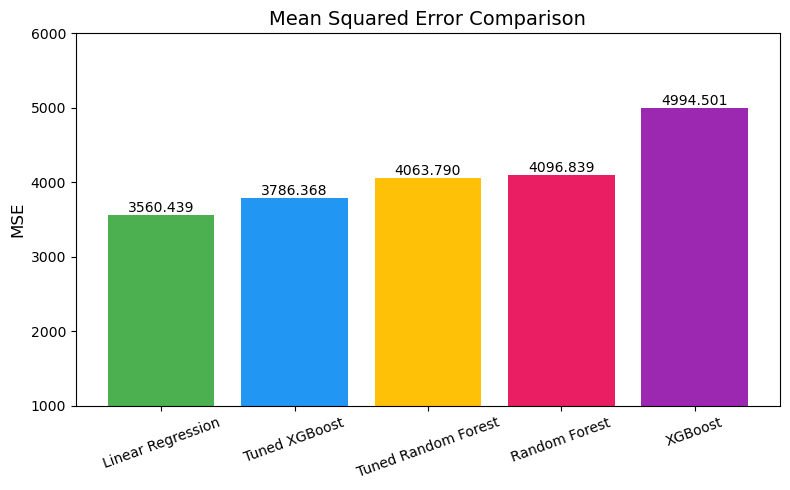

In [67]:
plt.figure(figsize=(8, 5))

colors = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63', '#9C27B0']
bars = plt.bar(eval_df['Model'], eval_df['MSE'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Mean Squared Error Comparison', fontsize=14)
plt.ylabel('MSE', fontsize=12)
plt.xticks(rotation=20)
plt.ylim(1000, 6000) 

plt.tight_layout()
plt.show()

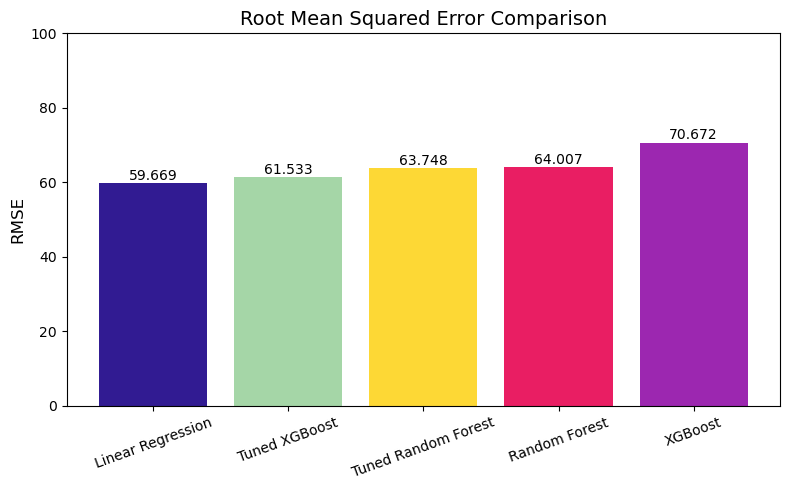

In [73]:
plt.figure(figsize=(8, 5))

colors = ['#311B92', '#A5D6A7', '#FDD835', '#E91E63', '#9C27B0']
bars = plt.bar(eval_df['Model'], eval_df['RMSE'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Root Mean Squared Error Comparison', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(rotation=20)
plt.ylim(0, 100) 

plt.tight_layout()
plt.show()